# Max of two means Problem

The problem:

Imagine we have two normally distributed random variables. They have mean and variance $\mu_1$, $\sigma_1$ and $\mu_2$, $\sigma_2$ repectively.

We then draw once each from both of these distributions and take the max of these two numbers. The procedure is itself a random varible. What is the mean of this second distribution, and how much does it differ from the naive estimate of the mean which is:

$$max(\mu_1, \mu_2)$$

### The Maths

Let D1 be the first distrubution, and D2 be the second.

D_max is the distrubition that we get from sampling from both distrubtions and taking the max of this.

$$D_1(x) = \phi_{\mu_1, \sigma_1}(x)$$

where $\phi$ is the normal distribution with given mean and variance. Similarly for D2.

Now we can define D_max. To get a value of x for D_max there are two ways we can do this. We get x for D1 and less than or eqaul to x for D2, or the other way round. So more formally.

$$D_{max}(x) = D_1(x)D_2(x'<x) + D_2(x)D_1(x'<x)$$

which just says what we have above.

Now we can express $D_2(x'<x)$ is infact the cumulative normal distribution, which we usually express with a capital phi, as so:

$$D_2(x'<x) = \Phi(x)$$

This $\Phi$ is the integral of the normal distribution, or the CDF, sometimes called the error function.

Now we can express the mean of $D_{max}$

$$\bar{D}_{max}=\int_{-\inf}^{\inf}{xD_{max}(x)}dx
$$

$$=\int_{-\inf}^{\inf}{x(D_1(x)D_2(x'<x) + D_2(x)D_1(x'<x))}dx$$

$$=\int_{-\inf}^{\inf}{x(\phi_1(x)\Phi_2(x) + \phi_2(x)\Phi_1(x))}dx$$

Maybe the above can be simplified via integration by parts?

also bare in mind that:

$$\int_{-\inf}^{\inf}{x(\phi_1(x))}dx = \mu_1$$

Now what we wanted was the error in the naive estimate, so finally this is:

$$Error = max(\mu_1, \mu_2) - \int_{-\inf}^{\inf}{x(\phi_1(x)\Phi_2(x) + \phi_2(x)\Phi_1(x))}dx$$

Now, either we can simplify the integral, or we can numerically integrate it to get the answer.

Is this right? Did I make a mistake?

### Simulating the problem

Let's try to simulate the issue.

In [7]:
import numpy as np
from numpy import random

In [205]:
mu1, mu2 = 0.5, 0.5
# Not sure what there were supposed to be?
sigma1, sigma2 = 1, 1

In [206]:
def get_error():

    sample_1 = random.normal(mu1, sigma1)
    sample_2 = random.normal(mu2, sigma2)

    mean_max = max(sample_1, sample_2)
    naive_estimate = max(mu1, mu2)

    return naive_estimate - mean_max

In [207]:
errors = [get_error() for _ in range(10000000)]

In [208]:
measured_error = np.mean(errors)
measured_error

-0.5642245566765915

In [209]:
import matplotlib.pyplot as plt

%matplotlib inline

(array([2.000000e+00, 4.000000e+00, 2.500000e+01, 1.910000e+02,
        1.363000e+03, 7.356000e+03, 3.196000e+04, 1.128380e+05,
        3.266600e+05, 7.623020e+05, 1.403695e+06, 1.995571e+06,
        2.142068e+06, 1.700444e+06, 9.772000e+05, 3.980790e+05,
        1.140340e+05, 2.268700e+04, 3.205000e+03, 2.890000e+02,
        2.700000e+01]),
 array([-6.02557475, -5.57505212, -5.1245295 , -4.67400687, -4.22348425,
        -3.77296163, -3.322439  , -2.87191638, -2.42139375, -1.97087113,
        -1.52034851, -1.06982588, -0.61930326, -0.16878064,  0.28174199,
         0.73226461,  1.18278724,  1.63330986,  2.08383248,  2.53435511,
         2.98487773,  3.43540036]),
 <a list of 21 Patch objects>)

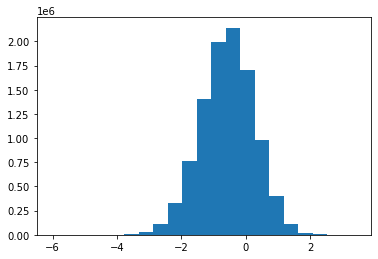

In [210]:
plt.hist(errors, bins=21)

### Get the error from the integral

Now let's see if we can get the error from the integral.

In [211]:
from scipy.stats import norm

In [212]:
x = 0.5
x*(norm.pdf(x, mu1, sigma1))

0.19947114020071635

In [213]:
def integrand(x, mu1, mu2, sigma1, sigma2):
    return x*(norm.pdf(x, mu1, sigma1)*norm.cdf(x, mu2, sigma2)
              + norm.pdf(x, mu2, sigma2)*norm.cdf(x, mu1, sigma1)
             )

In [214]:
x = np.linspace(-10, 10, 1001)
y = [integrand(xx, mu1, mu2, sigma1, sigma2) for xx in x]

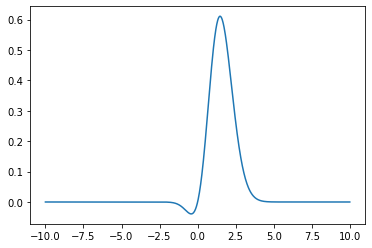

In [215]:
plt.plot(x, y)

Now we could integrate this function. We have to do over the infinite range, but just eyeballing the function it looks like it decays quickly, so we won't have to actually go to far to get a good approximation. Let's try this.

In [216]:
from scipy.integrate import quad

So integrate the above function from -10 to 10.

In [217]:
quad(lambda x: integrand(x, mu1, mu2, sigma1, sigma2), -10, 10)[0]

1.0641895835477564

See if the answer changes radically if I extend the tails:

In [218]:
quad(lambda x: integrand(x, mu1, mu2, sigma1, sigma2), -100, 100)[0]

1.0641895835477562

It doesn't!

So now the error term:

In [219]:
computed_error = max(mu1, mu2) - quad(lambda x: integrand(x, mu1, mu2, sigma1, sigma2), -10, 10)[0]

In [220]:
measured_error, computed_error

(-0.5642245566765915, -0.5641895835477564)

They are pretty damn close man!